# Actividad de evaluación: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    21/03/2023
# Introducción a Machine Learning con Python

In [2]:
#Importaciones

#Tratamiento de dataset
import pandas as pd
import numpy as np

#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Métricas de evaluación
from sklearn import metrics

#Time
import time
import os
import re

## Ejercicio 1: Lectura del data set y preprocesamiento
### 1.1 Lectura del dataset
Realizar la lectura del dataset e imprimir la información de sus columnas.<br>
Mostrar por pantalla el contenido de las 5 primeras filas. <br>
Mostrar una descripción de los estadísticos principales de la columnas numéricas.

In [3]:
def limpiar_csv(lab,finde):
    #añadimos una columna booleana y su valor dependera si es del csv del finde o no (1 si es fin de semana)
    lab['weekends'] = 0
    finde['weekends'] = 1
    #quitamos las columnas que no vamos a usar
    lab = lab.drop(['person_capacity', 'multi', 'guest_satisfaction_overall', 'dist', 
                    'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)
        
    finde = finde.drop(['person_capacity', 'multi', 'guest_satisfaction_overall', 'dist',
                        'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)
    
    return lab,finde

In [4]:
def union_csv(lab,finde):
    union = pd.concat([lab, finde], axis=0, ignore_index=True)
    #cambiar el nombre de la columna 1, que está vacio a ID
    union = union.rename(columns={'Unnamed: 0': 'Id'})
    #voy a ordenarlos por id
    union = union.sort_values(by="Id")
    return union

In [5]:
carpeta = 'data'  
lista_csv = []
ruta_carpeta = os.path.join(os.getcwd(), carpeta)  

archivos = os.listdir(ruta_carpeta)#lista con los nombres de los archivos de nuestra carpeta

for archivo in archivos:
    lista_csv.append(archivo)
    #print(archivo)

In [6]:
#ahora queremos que cada archivo de finde y entre semana se junten con los de su misma ciudad, haciendo todos los cambios antes
#declarados como quitar las columnas que no vamos a usar o añadir la columna
path = './data/' 
for i in range(0,len(lista_csv),2):
    lab = lista_csv[i]; finde = lista_csv[i+1]
    laborable =  pd.read_csv(path+lab)
    weekend =  pd.read_csv(path+finde)
    #aplicar las funciones de cambios
    laborable, weekend = limpiar_csv(laborable,weekend)
    #uniones de ambos dataframes
    union = union_csv(laborable,weekend)
        
    #para conseguir el nombre de la ciudad que estamos tratando, podemos usar expresiones regulares.
    ciudad = lab.split("_")[0]
    nombre = 'datos modificados/'+ciudad +'.csv'
    #print(ciudad)
    #generar el nuevo csv con el nombre de la ciudad
    #el mode w es para activar la sobreescritura
    union.to_csv(nombre, index=False,mode='w')

In [7]:
carpeta2 = 'datos modificados'
ruta_carpeta = os.path.join(os.getcwd(), carpeta2)  

archivos = os.listdir(ruta_carpeta)#lista con los nombres de los archivos de nuestra carpeta
#dataframe vacio como acumulador
total = pd.DataFrame()
path2 = './datos modificados/'
for archivo in archivos:       
    ciudad = archivo.split(".")[0]
    #pasar el csv a data frame
    doc = pd.read_csv(path2+archivo)
    #añadir una columna con el nombre de la ciudad a la que pertenece
    doc['Ciudad'] = ciudad
    #meterlo en el csv global (creo que el concat es lo que mejor funcionaria)
    total = pd.concat([total, doc], axis=0, ignore_index=True)
total.to_csv('AirBNBModificado.csv', index=False,mode='w')

In [8]:
AIRBNB = pd.read_csv('./AirBNBModificado.csv')
AIRBNB = AIRBNB.drop(['id'], axis=1)
AIRBNB

,Id,realSum,room_type,room_shared,room_private,host_is_superhost,biz,cleanliness_rating,bedrooms,lng,lat,weekends,Ciudad
0,0.0,194.033698,Private room,False,True,False,0,10.0,1,4.90569,52.41772,0,amsterdam
1,1.0,344.245776,Private room,False,True,False,0,8.0,1,4.90005,52.37432,0,amsterdam
2,2.0,264.101422,Private room,False,True,False,1,9.0,1,4.97512,52.36103,0,amsterdam
3,3.0,433.529398,Private room,False,True,False,1,9.0,2,4.89417,52.37663,0,amsterdam
4,4.0,485.552926,Private room,False,True,True,0,10.0,1,4.90051,52.37508,0,amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794.0,715.938574,Entire home/apt,False,False,False,1,10.0,3,16.37940,48.21136,1,vienna
51703,1795.0,304.793960,Entire home/apt,False,False,False,0,8.0,1,16.38070,48.20296,1,vienna
51704,1796.0,637.168969,Entire home/apt,False,False,False,0,10.0,1,16.38568,48.20460,1,vienna
51705,1797.0,301.054157,Private room,False,True,False,0,10.0,1,16.34100,48.19200,1,vienna


### Primera visualización del proyecto

realSum → sacar el precio medio por ubicación (barcelona,atenas, amsterdam) 

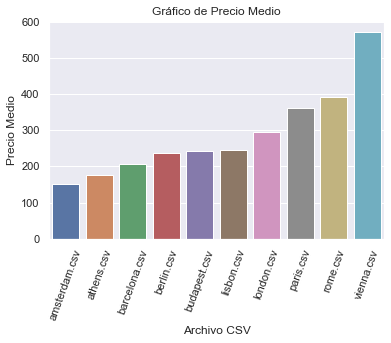

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path2 = './datos filtrados/'

# Lista de nombres de archivos CSV
archivos_csv = ['amsterdam.csv', 'athens.csv', 'barcelona.csv', 'berlin.csv', 'budapest.csv', 'lisbon.csv', 'london.csv',
               'paris.csv', 'rome.csv', 'vienna.csv']

# Lista para almacenar los precios medios
precios_medios = []

# Leer y combinar los datos de los archivos CSV
for archivo in archivos_csv:
    df = pd.read_csv(path2+archivo)
    precio_medio = df['realSum'].mean()
    precios_medios.append(precio_medio)
    nombre = archivo.split('.')[0]
# Crear un DataFrame con los precios medios
df_precios_medios = pd.DataFrame({'Archivo': archivos_csv, 'Precio Medio': precios_medios})

# Ordenar el DataFrame por el precio medio en orden ascendente
df_precios_medios = df_precios_medios.sort_values('Precio Medio')

# Crear un gráfico de barras utilizando Seaborn
sns.barplot(data=df_precios_medios, x='Archivo', y='Precio Medio')

# Etiquetas de los ejes
plt.xlabel('Archivo CSV')
plt.ylabel('Precio Medio')
plt.title('Gráfico de Precio Medio')


# Obtener los índices de los ticks del eje x
x_indices = range(len(archivos_csv))

# Establecer los ticks del eje x y las etiquetas
plt.xticks(x_indices, archivos_csv, rotation=70, ha='center')

# Mostrar el gráfico
plt.show()


### Segunda visualización del proyecto

mapa de calor → ranking de las ciudades con el mayor numero de superhosts dependiendo del tipo de habitación

<AxesSubplot:xlabel='room_type', ylabel='Ciudad'>

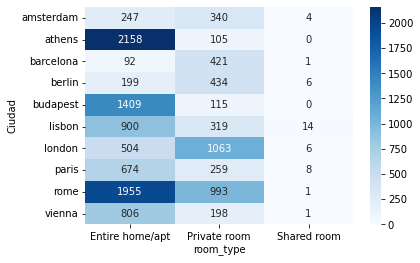

In [25]:
tabla = pd.crosstab(index=AIRBNB['Ciudad'], columns =AIRBNB['room_type'], values=AIRBNB['host_is_superhost'], aggfunc='sum')
#print(tabla)

sns.heatmap(tabla, annot=True, fmt='d', cmap='Blues')

### Tercera visualización

Grafica para mirar el nivel de limpieza de las ciudades

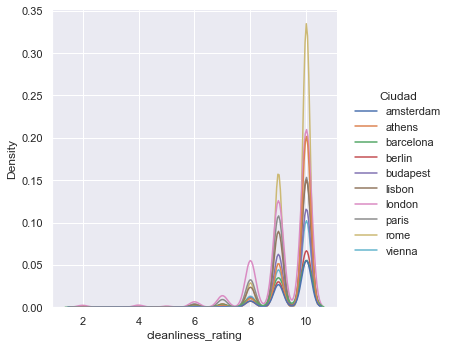

In [64]:
sns.displot(AIRBNB, x ='cleanliness_rating', kind='kde', hue='Ciudad')

Grafica de nivel de limpieza de las ciudades, entre semana y en los fines de semana

    Entre semana (dia laboral) -> Weekends = 0
    Fin de semana              -> Weekends = 1

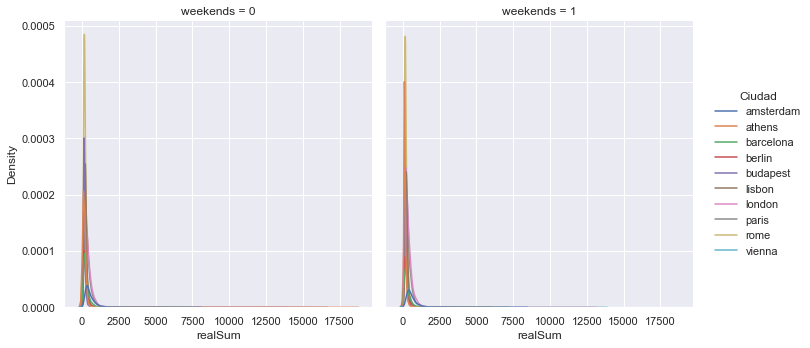

In [67]:
sns.displot(AIRBNB, x ='realSum', kind='kde', hue='Ciudad', col='weekends')

### Diagramas de tarta

Porcentaje del tipo de habitación que existen

<AxesSubplot:ylabel='room_type'>

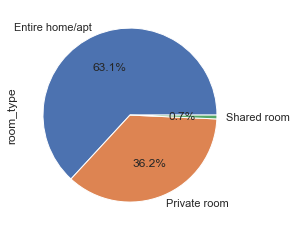

In [91]:
AIRBNB['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [92]:
print("valores", AIRBNB['room_type'].value_counts())

valores Entire home/apt    32648
Private room       18693
Shared room          366
Name: room_type, dtype: int64


Porcentaje de los tipos de habitación que existen cuando el anfitrion es superhost

<AxesSubplot:ylabel='room_type'>

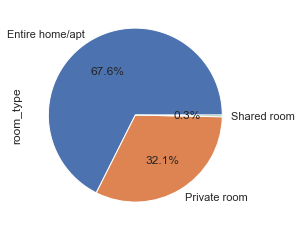

In [88]:
AIRBNB[(AIRBNB['host_is_superhost'] == True)]['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Porcentaje de los tipos de habitación que existen cuando el anfitrion no es superhost

<AxesSubplot:ylabel='room_type'>

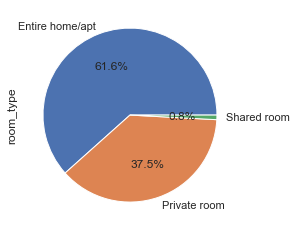

In [87]:
AIRBNB[(AIRBNB['host_is_superhost'] == False)]['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')